# Binary Prediction of Smoker Status using Bio-Signals

## Import Libraries

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline


## Read Data

In [2]:
train= pd.read_csv('train.csv', index_col='id')
test= pd.read_csv('test.csv', index_col='id')

In [3]:
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [21]:
test.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,...,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000
mean,44.426538,165.221322,67.125618,82.999892,1.004776,0.999483,1.024216,1.023980,122.475403,76.820676,...,127.406203,55.922286,114.597404,14.793354,1.072798,0.892463,25.559616,26.565427,36.086888,0.195458
std,11.897138,8.837065,12.586569,8.946584,0.397690,0.385752,0.153719,0.152988,12.765542,9.018782,...,66.352488,14.000552,26.943401,1.434296,0.340818,0.179927,9.504442,17.944195,30.928138,0.396555
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,8.000000,18.000000,1.000000,5.000000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,114.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,164.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,33.000000,44.000000,0.000000
max,85.000000,190.000000,130.000000,127.700000,9.900000,9.900000,2.000000,2.000000,213.000000,140.000000,...,548.000000,148.000000,1220.000000,21.100000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000


In [5]:
train.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

This shows that there are no null data

### Correlation

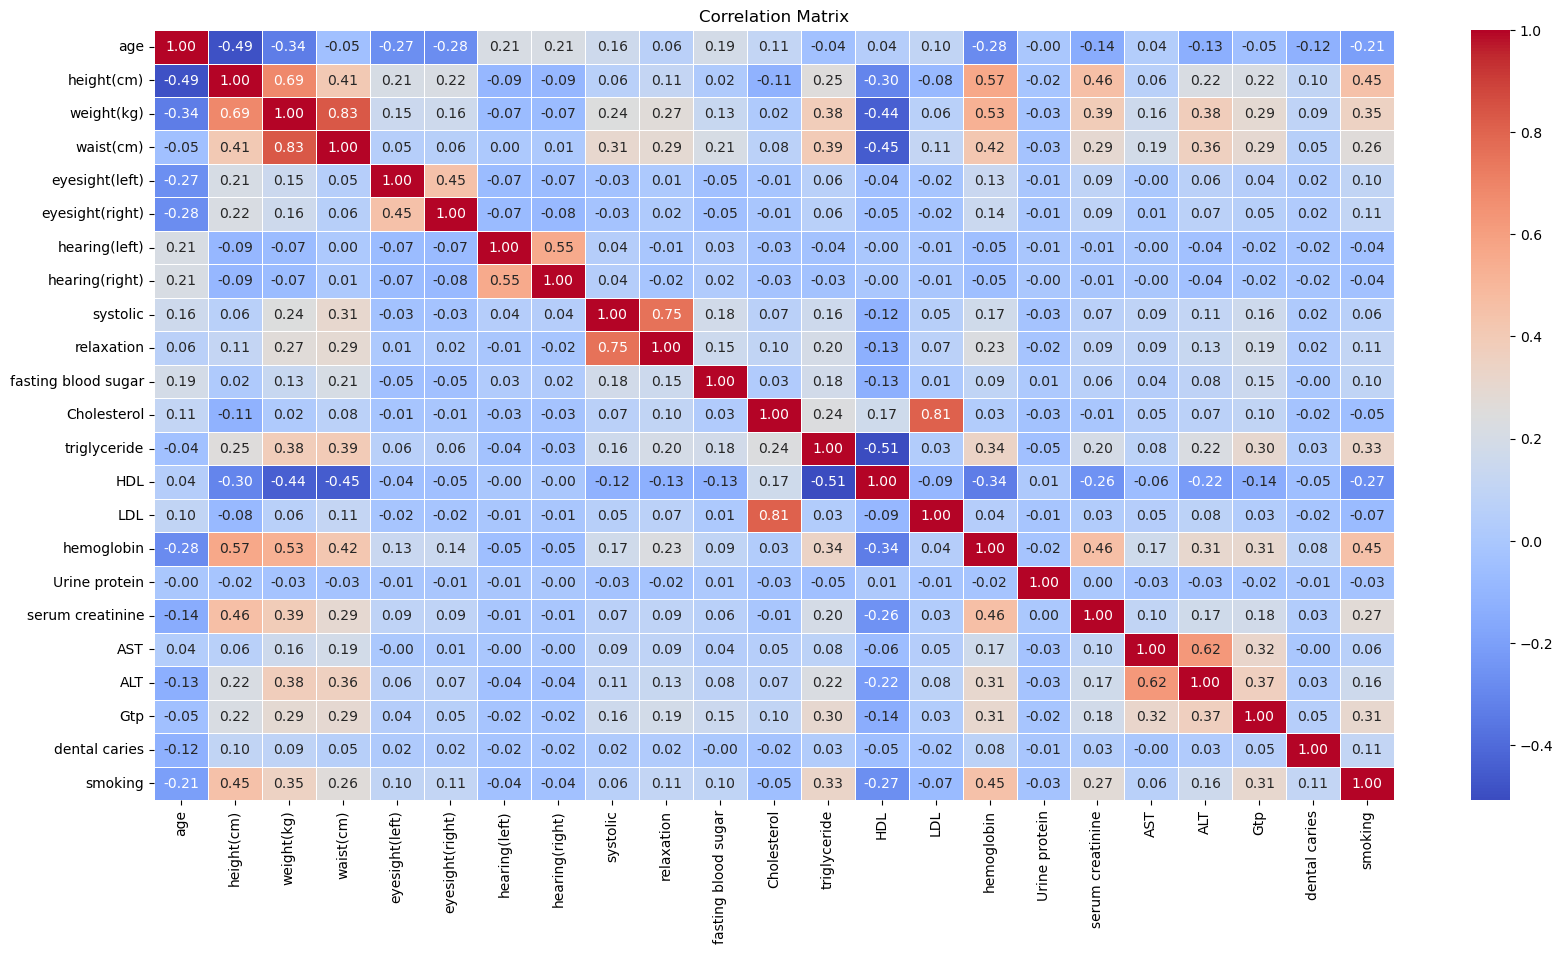

In [6]:
correlation_matrix = train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [7]:
correlation_matrix.iloc[:-1,-1].sort_values(ascending=False)

hemoglobin             0.450679
height(cm)             0.447111
weight(kg)             0.351748
triglyceride           0.331975
Gtp                    0.305561
serum creatinine       0.272979
waist(cm)              0.262715
ALT                    0.163016
eyesight(right)        0.109781
relaxation             0.109501
dental caries          0.106636
eyesight(left)         0.100420
fasting blood sugar    0.096534
AST                    0.059394
systolic               0.058642
Urine protein         -0.028548
hearing(right)        -0.036858
hearing(left)         -0.038219
Cholesterol           -0.051896
LDL                   -0.072285
age                   -0.206033
HDL                   -0.271186
Name: smoking, dtype: float64

### Training Dataset

In [8]:
x= train.drop(['smoking'],axis=1)
y= train['smoking']
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=23)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=100)

## Model Fitting

### X Gradient Boosting

In [9]:
xgbm = XGBClassifier(random_state=23)

### LightGBM

In [10]:
lgbm = LGBMClassifier(random_state=23)

## CatBoost

In [11]:
cgbm = CatBoostClassifier(random_state=23)

In [16]:
pipeline = Pipeline([('model', xgbm)])
params={
    'model':[xgbm, lgbm, cgbm],
    'model__max_depth': [6],
    'model__learning_rate': np.linspace(0.001, 0.299, 10),
    'model__n_estimators': [250]
}

gcv_xgbm = GridSearchCV(pipeline, param_grid=params, verbose=3, n_jobs=4,
                        cv=kfold, scoring='roc_auc')
gcv_xgbm.fit(x, y)
print(gcv_xgbm.best_params_)
print(gcv_xgbm.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.16655555555555557,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=23, ...), 'model__learning_rate': 0.16655555555555557, 'model__max_depth': 6, 'model__n_estimators': 250}
0.8676414518779163


##### From the GridSearchCV the XGBCLassifier seems slightly better than other two. So, we use XGBM for model building

In [17]:
xgbm = XGBClassifier(random_state=23, learning_rate=  0.16655555555555557, max_depth= 6, n_estimators= 250)
model= xgbm.fit(X_train, y_train)

predict= model.predict_proba(X_test)[:,1]
predict

array([0.03360565, 0.708679  , 0.20696785, ..., 0.5449627 , 0.04667868,
       0.01717019], dtype=float32)

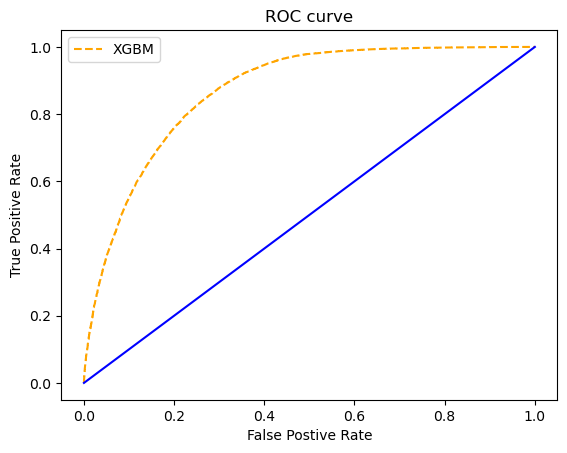

In [18]:

fpr, tpr, thresh = roc_curve(y_test, predict, pos_label=1)

random_probs= [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


plt.plot(fpr, tpr, label="XGBM", color='orange', linestyle='--' )
plt.plot(p_fpr, p_tpr, color='blue' )
plt.title("ROC curve")
plt.xlabel('False Postive Rate')
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.show()

In [19]:
xgbm = XGBClassifier(
    random_state=23, learning_rate=0.16655555555555557, max_depth=6, n_estimators=250)
model = xgbm.fit(x, y)

predict = model.predict_proba(test)[:, 1]
predict


array([0.6067825 , 0.38788015, 0.38854164, ..., 0.46051744, 0.05386219,
       0.03689257], dtype=float32)

In [23]:
sub = pd.read_csv('sample_submission.csv')
sub['smoking'] =  predict
sub.to_csv('submission_pure.csv',index=False)
sub.head()

,id,smoking
0,159256,0.606782
1,159257,0.387880
2,159258,0.388542
3,159259,0.021095
4,159260,0.582887
